In [1]:
#Домашнее задание. Свёрточные сети

In [2]:
#Здесь вам предстоит построить и обучить свою первую свёрточную сеть для классификации изображений на данных CIFAR10.

In [3]:
import tensorflow as tf

from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Загрузите данные, разделите их на обучающую и тестовую выборки. Размер тестовой выборки должен быть  104 .

In [5]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

(40000, 32, 32, 3) (40000, 1)


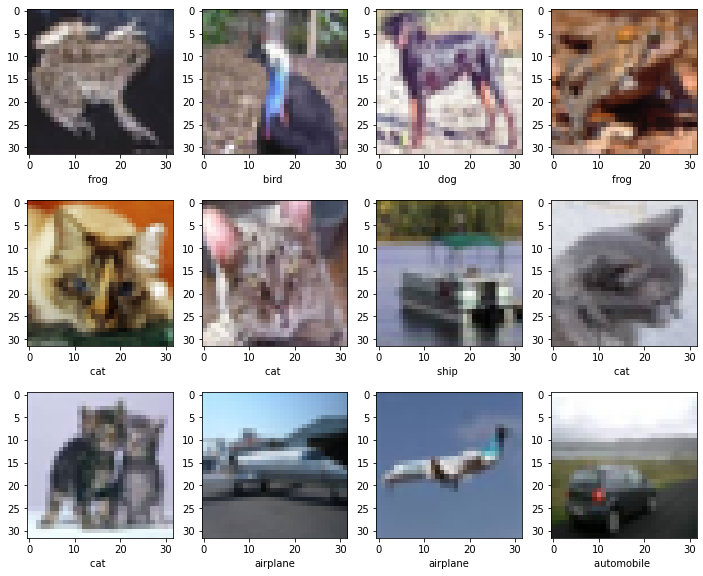

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

In [7]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [8]:
assert np.shape(X_train) == (40000, 32, 32, 3), "data shape should not change"
assert 0.9 <= max(map(np.max, (X_train, X_val, X_test))) <= 1.05
assert 0.0 <= min(map(np.min, (X_train, X_val, X_test))) <= 0.1
assert len(np.unique(X_test / 255.)) > 10, "make sure you casted data to float type"

In [9]:
import keras
from keras import layers as L
from keras import backend as K

In [10]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])


In [11]:
dummy_pred = model1.predict_proba(X_train[:20])
assert dummy_pred.shape == (20, 10)
assert np.allclose(dummy_pred.sum(-1), 1)
print("Успех!")

Успех!


In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [13]:
#Conclusions
#The NN predicts correctly for chosen 20 train samples

In [14]:
#Обучение сети

In [15]:
#Задание 1.1 Будем минимизировать многоклассовую кроссэкнропию с помощью sgd. 
#Вам нужно получить сеть, которая достигнет не менее 45% accuracy на тестовых данных.
#Важно: поскольку в y_train лежат номера классов, Керасу нужно либо указать sparse функции потерь и 
#метрики оценки качества классификации (sparse_categorical_crossentropy и sparse_categorical_accuracy), 
#либо конвертировать метки в one-hot формат.

In [16]:
y_train, y_val = (keras.utils.to_categorical(y) for y in (y_train, y_val))

In [17]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='/tmp/checkpoint',save_weights_only=True,monitor='val_accuracy',
                                       mode='max',save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [18]:
#model.compile позволяет указать, какие метрики вы хотите вычислять.
model1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model1.fit(X_train, 
          y_train,
          batch_size=32, 
          epochs=5,
          validation_split=0.2,
          callbacks=[])

Epoch 1/5
1000/1000 [==============================] - 17s 17ms/step - loss: 2.2391 - accuracy: 0.1461 - val_loss: 1.8812 - val_accuracy: 0.3376
Epoch 2/5
1000/1000 [==============================] - 16s 16ms/step - loss: 1.8322 - accuracy: 0.3463 - val_loss: 1.6648 - val_accuracy: 0.4038
Epoch 3/5
1000/1000 [==============================] - 16s 16ms/step - loss: 1.6439 - accuracy: 0.4076 - val_loss: 1.5401 - val_accuracy: 0.4445
Epoch 4/5
1000/1000 [==============================] - 15s 15ms/step - loss: 1.5583 - accuracy: 0.4414 - val_loss: 1.4972 - val_accuracy: 0.4559
Epoch 5/5
1000/1000 [==============================] - 15s 15ms/step - loss: 1.4797 - accuracy: 0.4680 - val_loss: 1.4684 - val_accuracy: 0.4678


In [20]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model1.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.4772
 Not bad!


In [21]:
#Conclusions
#Optimizer is SGD and categorical_crossentropy is chosen as a metric. The NN achieves the 47,72% accuracy

In [22]:
#Карманная сверточная сеть

In [23]:
#Задание 1.2 Реализуйте небольшую свёрточную сеть. Совсем небольшую:
#Входной слой
#Свёртка 3x3 с 10 фильтрами
#Нелинейность на ваш вкус
#Max-pooling 2x2
#Вытягиваем оставшееся в вектор (Flatten)
#Полносвязный слой на 100 нейронов
#Нелинейность на ваш вкус
#Выходной полносвязный слой с softmax
#Обучите её так же, как и предыдущую сеть. Если всё хорошо, у вас получится accuracy не меньше 50%.

In [24]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])


In [25]:
#model.compile позволяет указать, какие метрики вы хотите вычислять.
model2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model2.fit(X_train, 
          y_train,
          batch_size=32, 
          epochs=10,
          validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 8s 8ms/step - loss: 2.1182 - accuracy: 0.2179 - val_loss: 1.8426 - val_accuracy: 0.3564
Epoch 2/10
1000/1000 [==============================] - 7s 7ms/step - loss: 1.7916 - accuracy: 0.3705 - val_loss: 1.6604 - val_accuracy: 0.4151
Epoch 3/10
1000/1000 [==============================] - 8s 8ms/step - loss: 1.6360 - accuracy: 0.4266 - val_loss: 1.5561 - val_accuracy: 0.4475
Epoch 4/10
1000/1000 [==============================] - 8s 8ms/step - loss: 1.4938 - accuracy: 0.4724 - val_loss: 1.4444 - val_accuracy: 0.4885
Epoch 5/10
1000/1000 [==============================] - 7s 7ms/step - loss: 1.4011 - accuracy: 0.5052 - val_loss: 1.3808 - val_accuracy: 0.5073
Epoch 6/10
1000/1000 [==============================] - 7s 7ms/step - loss: 1.3332 - accuracy: 0.5279 - val_loss: 1.3484 - val_accuracy: 0.5228
Epoch 7/10
1000/1000 [==============================] - 7s 7ms/step - loss: 1.2686 - accuracy: 0.5527 - val_loss: 1.2989 - val_accuracy:

In [27]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model2.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.5713
 Not bad!


In [28]:
#Conclusions
#Optimizer is SGD and categorical_crossentropy is chosen as a metric as before. The model has only one conv. layer, 
#1 pooling. The epochs increased 2 times.
#The NN achieves 57,13% accuracy

In [29]:
#Учимся учить

In [30]:
#А теперь научимся сравнивать кривые обучения моделей — зависимости значения accuracy от количества итераций.
#Вам потребуется реализовать экспериментальный стенд — вспомогательный код, в который вы сможете подать 
#несколько архитектур и методов обучения, чтобы он их обучил и вывел графики кривых обучения. 
#Это можно сделать с помощью keras.callbacks — TensorBoard или History.

In [31]:
#Задание 1.3 Попробуйте использовать различные методы оптимизации (sgd, momentum, adam) 
#с параметрами по умолчанию. Какой из методов работает лучше?
#Для удобства напишем класс Evaluator, который принимает в себя дикты виды {имя_оптимайзера: инстанс}, 
#{имя модели: инстанс} и обучает всевозможные комбинации моделей с оптимайзерами при помощи метода fit 
#(попутно записывая логи отдельно для каждой модели). Также пригодится метод evaluate для отображения итоговых скоров.
#Пользоваться классом не обязательно. По умолчанию класс использует tensorboard. 
#Если вы выше использовали wandb -- советуем дописать callback.

In [32]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(4, 4),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])



In [33]:
class Evaluator(list):
    def __init__(self, models, optimizers='adam', loss=keras.losses.categorical_crossentropy,
                 metrics=[keras.metrics.categorical_accuracy]):
        '''
            models: dict {name: model}
            optimizers: list of optimizers or just one optimizer
        '''
        if not isinstance(models, dict):
            models = {'single_model': models}
        if not isinstance(optimizers, dict):
            optimizers = {str(optimizers.__class__): optimizers}
        super().__init__([(model_name, keras.models.clone_model(model), optimizer_name, optimizer)
                          for model_name, model in models.items()
                          for optimizer_name, optimizer in optimizers.items()])
        for _, model, _, optimizer in self:
            model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
            
    def fit(self, X, y, validation_data=(), max_epochs=100, verbose=0, callbacks=[], batch_size=32):
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):
            model.fit(X, y, validation_data=validation_data or None, epochs=max_epochs, verbose=verbose,
                      batch_size=batch_size, callbacks=callbacks + [keras.callbacks.TensorBoard(
                          log_dir='./logs/{}_{}'.format(model_name, optimizer_name))])
            
    def fit_generator(self, X, y, validation_data=(), max_epochs=100, verbose=1, callbacks=[], batch_size=32):
        datagen = keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
        )
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):
            model.fit_generator(datagen.flow(X, y, batch_size=batch_size), epochs=max_epochs,
                validation_data=validation_data or None, verbose=verbose,
                callbacks=callbacks + [keras.callbacks.TensorBoard(
                    log_dir='./logs/{}_{}'.format(model_name, optimizer_name))])
        
    def evaluate(self, X, y, metric):
        for model_name, model, optimizer_name, _ in self:
            print('Final score of {}_{} is {}'.format(model_name, optimizer_name,
                  metric(y_test, model.predict_classes(X_test))))

In [34]:
!rm -rf ./logs

In [35]:
optimizers = {
     'SGD': 'SGD',
    'Adam': 'Adam',
    'RMSProp': 'RMSProp',
}

In [36]:
models =  {
     'model_name': 'model3',
}

In [37]:
evaluator = Evaluator(model3, optimizers=optimizers)


In [38]:
evaluator.fit(X_train, y_train, validation_data=(X_val, y_val))


In [39]:
evaluator.evaluate(X_test, y_test, accuracy_score)

Final score of single_model_SGD is 0.6346
Final score of single_model_Adam is 0.6203
Final score of single_model_RMSProp is 0.6002


In [40]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 10)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        2576      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [50]:
%load_ext tensorboard
import datetime, os
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 6191), started 1:42:54 ago. (Use '!kill 6191' to kill it.)

In [51]:
#Conclusions
#Categorical_crossentropy is chosen as a metric as before. The optimizer which shows the best result is: SGD.
#The NN achieves 63,46% accuracy for the model with 2 conv. layers and 2 pooling layers.
#The accuracy for train samples showed better results, the loss for valiadation samples inclreases, 
#which needs to be improved.

In [52]:
#Задание 1.4 Добавьте нормализацию по батчу (BatchNormalization) между свёрткой и активацией. 
#Попробуйте использовать несколько нормализаций — в свёрточных и полносвязных слоях.

#Для удобства реализуем класс Models, который по сути будет являться списком моделей с двумя методами: 
#add (добавить слой ко всем моделям) и add_create (создать новую модель на основе базовой с дополнительным слоем). 
#Пользоваться им необязательно, но вдруг :)'

In [67]:
model4 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])



In [68]:
from collections import OrderedDict

class Models(OrderedDict):
    def __init__(self, models):
        if not isinstance(models, dict):
            models = OrderedDict({'base_model': models})
        super().__init__(models)
        
    def add(self, layer):
        for name, model in self.items():
            model.add(layer)
            
    def add_create(self, name, layer):
        base_model = next(iter(self.items()))[1]
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})
        
    def add_update(self, name, layer):
        base_model = self[next(reversed(self))]
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})


In [71]:
model4.compile(optimizer='RMSProp',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model4.fit(X_train, 
          y_train,
          batch_size=128, 
          epochs=20,
          validation_split=0.3)

Epoch 1/20
219/219 [==============================] - 10s 43ms/step - loss: 1.8568 - accuracy: 0.3492 - val_loss: 2.9826 - val_accuracy: 0.1957
Epoch 2/20
219/219 [==============================] - 9s 42ms/step - loss: 1.3009 - accuracy: 0.5354 - val_loss: 1.8984 - val_accuracy: 0.3512
Epoch 3/20
219/219 [==============================] - 9s 41ms/step - loss: 1.1414 - accuracy: 0.5965 - val_loss: 1.2390 - val_accuracy: 0.5607
Epoch 4/20
219/219 [==============================] - 9s 41ms/step - loss: 1.0416 - accuracy: 0.6350 - val_loss: 1.2779 - val_accuracy: 0.5556
Epoch 5/20
219/219 [==============================] - 9s 42ms/step - loss: 0.9670 - accuracy: 0.6619 - val_loss: 1.2281 - val_accuracy: 0.5736
Epoch 6/20
219/219 [==============================] - 9s 42ms/step - loss: 0.9151 - accuracy: 0.6786 - val_loss: 1.1711 - val_accuracy: 0.5999
Epoch 7/20
219/219 [==============================] - 9s 42ms/step - loss: 0.8732 - accuracy: 0.6958 - val_loss: 1.1710 - val_accuracy: 0.605

In [73]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model4.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.5789
 Not bad!


In [74]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 10)        280       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 10)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 10)        40        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 16)        1456      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 8, 8, 16)          64        
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)             

In [ ]:
#Conclusions
#Categorical_crossentropy is chosen as a metric as before. The optimizer is: RMSProp.
#The NN achieves 57,89% accuracy for the model with 2 conv. layers and 2 pooling layers and with batch_normalization.

In [92]:
#Задание 1.5 Посмотрите на batch_size (параметр model.fit) - при большем батче модель 
#будет быстрее проходить эпохи, но с совсем огромным батчом вам потребуется больше эпох для сходимости 
#(т.к. сеть делает меньше шагов за одну эпоху). Найдите такое значение, при котором модель быстрее достигает 
#точности 55%. Hint: используйте early stopping callback.

In [93]:
batch_size=[32,64,128,256]


In [96]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta = 0.55, patience = 0),
   ]

In [99]:
for i in range(len(batch_size)):
    
    model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
    

    model5.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    model5.fit(X_train, 
          y_train,
          batch_size=batch_size[i], 
          epochs=10,
          validation_split=0.2,
          callbacks = [])
    test_acc = accuracy_score(y_test, model5.predict_classes(X_test))
    print("\n Test_acc =", test_acc, 'for batch size ',batch_size[i],'\n')

Epoch 1/10
1000/1000 [==============================] - 13s 13ms/step - loss: 1.9277 - accuracy: 0.3177 - val_loss: 1.8733 - val_accuracy: 0.3710
Epoch 2/10
1000/1000 [==============================] - 13s 13ms/step - loss: 1.4079 - accuracy: 0.4962 - val_loss: 1.3573 - val_accuracy: 0.5154
Epoch 3/10
1000/1000 [==============================] - 13s 13ms/step - loss: 1.2427 - accuracy: 0.5570 - val_loss: 1.2538 - val_accuracy: 0.5552
Epoch 4/10
1000/1000 [==============================] - 13s 13ms/step - loss: 1.1437 - accuracy: 0.5947 - val_loss: 1.2296 - val_accuracy: 0.5691
Epoch 5/10
1000/1000 [==============================] - 13s 13ms/step - loss: 1.0812 - accuracy: 0.6207 - val_loss: 1.2011 - val_accuracy: 0.5800
Epoch 6/10
1000/1000 [==============================] - 13s 13ms/step - loss: 1.0165 - accuracy: 0.6403 - val_loss: 1.2475 - val_accuracy: 0.5612
Epoch 7/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.9759 - accuracy: 0.6590 - val_loss: 1.1244 -

In [100]:
#conclusion
#Optimizer SGD is chosen. For the same model4, model5 with batch size 32 showed the bset results, 
#as Test_acc = 0.6247.
#The epoch size was the same and equal to 10.

In [101]:
#Задание 1.6 (опционально) Попробуйте найти такую комбинацию метода обучения и нормализации, при которой сеть 
#имеет наилучшую кривую обучения. Поясните, что вы понимаете под "наилучшей" кривой обучения.

In [102]:
model0 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=17, 
                           kernel_size=(6, 6),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
   
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

    
model0.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [104]:
model0.fit(x=X_train, 
        y=y_train, 
        epochs=10, 
        validation_split=0.2, 
        callbacks=[tensorboard_callback])

Epoch 1/10
1000/1000 [==============================] - 22s 22ms/step - loss: 1.8531 - accuracy: 0.3447 - val_loss: 1.6780 - val_accuracy: 0.4055
Epoch 2/10
1000/1000 [==============================] - 23s 23ms/step - loss: 1.3729 - accuracy: 0.5077 - val_loss: 1.4454 - val_accuracy: 0.4830
Epoch 3/10
1000/1000 [==============================] - 20s 20ms/step - loss: 1.2266 - accuracy: 0.5585 - val_loss: 1.4015 - val_accuracy: 0.5199
Epoch 4/10
1000/1000 [==============================] - 23s 23ms/step - loss: 1.1228 - accuracy: 0.6069 - val_loss: 1.2036 - val_accuracy: 0.5654
Epoch 5/10
1000/1000 [==============================] - 21s 21ms/step - loss: 1.0417 - accuracy: 0.6318 - val_loss: 1.2052 - val_accuracy: 0.5800
Epoch 6/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.9954 - accuracy: 0.6489 - val_loss: 1.1310 - val_accuracy: 0.6051
Epoch 7/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.9375 - accuracy: 0.6719 - val_loss: 1.1917 -

In [106]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 6191), started 3:15:06 ago. (Use '!kill 6191' to kill it.)

In [107]:
#Conclusions:
#from TensorBoard we can observe how training and test loss change across epochs. 
#The best loss line is, when you see training and test loss decrease over time and then remain steady.
#The best accuracy line, is when it increases across epochs.
#From the results, we can see that the accuracy line increases over epochs, but probably, it is not the best possible 
#line.

In [ ]:
#Задание 1.7 Наигравшись выше, обучим большую свёрточную сеть, 
#которая даст на тестовой выборке accuracy больше 80%. В этом задании вам потребуется провести эксперименты, 
#сравнив их между собой в конце. Возможно, может быть несколько проще, если писать выводы во время или сразу 
#после каждого эксперимента, после чего сделать общие выводы.
#Рекомендуем начать с лучшей модели предыдущего задания и постепенно её улучшать. 
#Вы можете использовать всё, что угодно: любые активации, сколь угодно большие свёрточные слои и глубокие сети. 
#Единственное ограничение: нельзя использовать предобученные сети и дополнительные данные.

In [128]:
model6 = tf.keras.models.Sequential([
    L.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu',
                           input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=17, 
                           kernel_size=(6, 6),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
   
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=13, 
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])


In [129]:
model6.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [130]:
model6.fit(X_train, 
          y_train,
          batch_size=64, 
          epochs=30,
          validation_split=0.2)
test_acc = accuracy_score(y_test, model6.predict_classes(X_test))
print("\n Test_acc =", test_acc)

Epoch 1/30
500/500 [==============================] - 21s 41ms/step - loss: 2.0405 - accuracy: 0.2608 - val_loss: 1.7057 - val_accuracy: 0.3780
Epoch 2/30
500/500 [==============================] - 20s 40ms/step - loss: 1.5219 - accuracy: 0.4493 - val_loss: 1.4370 - val_accuracy: 0.4748
Epoch 3/30
500/500 [==============================] - 20s 41ms/step - loss: 1.3647 - accuracy: 0.5064 - val_loss: 1.5294 - val_accuracy: 0.4566
Epoch 4/30
500/500 [==============================] - 20s 40ms/step - loss: 1.2645 - accuracy: 0.5505 - val_loss: 1.5577 - val_accuracy: 0.4550
Epoch 5/30
500/500 [==============================] - 20s 41ms/step - loss: 1.2095 - accuracy: 0.5678 - val_loss: 1.6140 - val_accuracy: 0.4475
Epoch 6/30
500/500 [==============================] - 20s 41ms/step - loss: 1.1379 - accuracy: 0.5968 - val_loss: 1.1951 - val_accuracy: 0.5805
Epoch 7/30
500/500 [==============================] - 20s 41ms/step - loss: 1.0997 - accuracy: 0.6147 - val_loss: 1.1695 - val_accuracy:

In [126]:
model6.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 10)        280       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 16, 16, 10)        0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 16, 16, 10)        40        
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 16, 16, 17)        6137      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 8, 8, 17)          0         
_________________________________________________________________
batch_normalization_52 (Batc (None, 8, 8, 17)          68        
_________________________________________________________________
flatten_35 (Flatten)         (None, 1088)            

In [127]:
test_acc = accuracy_score(y_test, model6.predict_classes(X_test))
print("\n Test_acc =", test_acc)


 Test_acc = 0.6272


In [ ]:
#Conclusion
#the simple model showed 62.63% of accuracy in validation samples.
#Let's check if we can achieve improvements with ResNet50

In [141]:
input_t = tf.keras.Input(shape = (32,32,3))
model11=tf.keras.applications.ResNet50(include_top = False,
                                       weights = "imagenet",
                                       input_tensor=input_t)

94773248/94765736 [==============================] - 70s 1us/step


In [142]:
#Set some layers as non-trainable
#It reduces computation time, reduces overffiting but lowers accuracy

for layer in model11.layers[:100]:
    layer.trainable = False

In [143]:
for i, layer in enumerate(model11.layers):
    print(i, layer.name, "-", layer.trainable)

0 input_21 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv -

In [146]:
model = tf.keras.models.Sequential()
model.add(model11)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [150]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [151]:
model.fit(X_train, 
          y_train,
          batch_size=32,
          epochs=5,
          validation_split=0.2)
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)

Epoch 1/5
1000/1000 [==============================] - 817s 814ms/step - loss: 2.0948 - accuracy: 0.3196 - val_loss: 11.4904 - val_accuracy: 0.1854
Epoch 2/5
1000/1000 [==============================] - 828s 828ms/step - loss: 1.4714 - accuracy: 0.5013 - val_loss: 61.0642 - val_accuracy: 0.0940
Epoch 3/5
1000/1000 [==============================] - 842s 842ms/step - loss: 1.2944 - accuracy: 0.5566 - val_loss: 13.6771 - val_accuracy: 0.1434
Epoch 4/5
1000/1000 [==============================] - 838s 838ms/step - loss: 1.1593 - accuracy: 0.5940 - val_loss: 3.1474 - val_accuracy: 0.2531
Epoch 5/5
1000/1000 [==============================] - 838s 838ms/step - loss: 1.0509 - accuracy: 0.6380 - val_loss: 3.7679 - val_accuracy: 0.2276

 Test_acc = 0.2245


In [152]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_38 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_74 (Dense)             (None, 10)                20490     
Total params: 23,608,202
Trainable params: 19,473,418
Non-trainable params: 4,134,784
_________________________________________________________________


In [ ]:
#the results for 5 epochs showed not good results (22.45%), the next model DenseNet121 is checked

In [196]:
input_t = tf.keras.Input(shape = (32,32,3))
model12=tf.keras.applications.densenet.DenseNet121(
    include_top=True, weights='imagenet', input_tensor=input_t,
    input_shape=None, pooling=None, classes=1000
)

In [197]:
model = tf.keras.models.Sequential()
model.add(model12)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [198]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [199]:
model.fit(X_train, 
          y_train,
          batch_size=32,
          epochs=60,
          validation_data=(X_val, y_val))
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)

Epoch 1/80
1250/1250 [==============================] - 677s 537ms/step - loss: 2.3010 - accuracy: 0.1112 - val_loss: 2.2908 - val_accuracy: 0.1757
Epoch 2/80
1250/1250 [==============================] - 647s 518ms/step - loss: 2.2755 - accuracy: 0.2037 - val_loss: 2.1885 - val_accuracy: 0.2678
Epoch 3/80
1250/1250 [==============================] - 472s 377ms/step - loss: 2.1571 - accuracy: 0.2977 - val_loss: 2.0328 - val_accuracy: 0.3767
Epoch 4/80
1250/1250 [==============================] - 381s 305ms/step - loss: 1.9883 - accuracy: 0.4004 - val_loss: 1.8271 - val_accuracy: 0.4442
Epoch 5/80
1250/1250 [==============================] - 377s 302ms/step - loss: 1.7737 - accuracy: 0.4556 - val_loss: 1.6243 - val_accuracy: 0.4727
Epoch 6/80
1250/1250 [==============================] - 370s 296ms/step - loss: 1.5883 - accuracy: 0.4723 - val_loss: 1.4460 - val_accuracy: 0.4917
Epoch 7/80
1250/1250 [==============================] - 371s 297ms/step - loss: 1.4318 - accuracy: 0.4983 - val_

1250/1250 [==============================] - 381s 305ms/step - loss: 0.4425 - accuracy: 0.7948 - val_loss: 0.8739 - val_accuracy: 0.6980
Epoch 57/80
1250/1250 [==============================] - 380s 304ms/step - loss: 0.4251 - accuracy: 0.7939 - val_loss: 0.8176 - val_accuracy: 0.7059
Epoch 58/80
1250/1250 [==============================] - 378s 302ms/step - loss: 0.4210 - accuracy: 0.7933 - val_loss: 0.8518 - val_accuracy: 0.6881
Epoch 59/80
1250/1250 [==============================] - 376s 301ms/step - loss: 0.4136 - accuracy: 0.7925 - val_loss: 0.8266 - val_accuracy: 0.7021
Epoch 60/80
1250/1250 [==============================] - 379s 303ms/step - loss: 0.4127 - accuracy: 0.7901 - val_loss: 0.8278 - val_accuracy: 0.7015
Epoch 61/80
1250/1250 [==============================] - 390s 312ms/step - loss: 0.4034 - accuracy: 0.7958 - val_loss: 0.8432 - val_accuracy: 0.7022
Epoch 62/80
1250/1250 [==============================] - 858s 687ms/step - loss: 0.4008 - accuracy: 0.7982 - val_loss:

KeyboardInterrupt: 

In [200]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    
]

In [201]:
model.fit(X_train, 
          y_train,
          batch_size=64,
          epochs=20,
          validation_data=(X_val, y_val),
          callbacks = [])
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)

Epoch 1/20
625/625 [==============================] - 373s 589ms/step - loss: 0.3668 - accuracy: 0.8014 - val_loss: 0.8274 - val_accuracy: 0.7102
Epoch 2/20
625/625 [==============================] - 373s 597ms/step - loss: 0.3618 - accuracy: 0.8057 - val_loss: 0.8049 - val_accuracy: 0.7154
Epoch 3/20
625/625 [==============================] - 381s 610ms/step - loss: 0.3599 - accuracy: 0.8035 - val_loss: 0.8112 - val_accuracy: 0.7130
Epoch 4/20
625/625 [==============================] - 391s 626ms/step - loss: 0.3580 - accuracy: 0.8041 - val_loss: 0.8111 - val_accuracy: 0.7153
Epoch 5/20
625/625 [==============================] - 380s 608ms/step - loss: 0.3567 - accuracy: 0.8059 - val_loss: 0.8079 - val_accuracy: 0.7146
Epoch 6/20
625/625 [==============================] - 376s 601ms/step - loss: 0.3558 - accuracy: 0.8041 - val_loss: 0.8107 - val_accuracy: 0.7117
Epoch 7/20
625/625 [==============================] - 894s 1s/step - loss: 0.3547 - accuracy: 0.8020 - val_loss: 0.8037 - va

In [ ]:
#conclusion:
#the task is not yet finished. With batch_size 32 it reaches the around 70% at epoch around 60, and no more improvements are observed. 
#The run is interrupted and continued to check if there is a change with batch_size 64 with epoch 20. The improvement 
# is only 72.76%. 